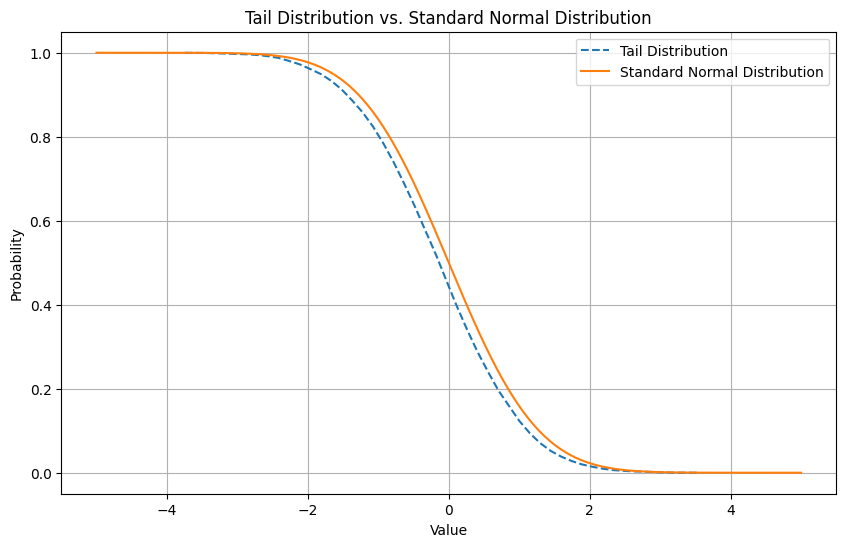

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate random data from a normal distribution
data_size = 10000
data = np.random.normal(mu, sigma, data_size)

# Create a histogram of the data
hist, bin_edges = np.histogram(data, bins=50, density=True)

# Calculate the cumulative distribution function (CDF)
cdf = np.cumsum(hist * np.diff(bin_edges))

# Calculate the complementary cumulative distribution function (1 - CDF)
ccdf = 1 - cdf

# Plot the tail distribution
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], ccdf, label='Tail Distribution', linestyle='--')

# Plot the standard normal distribution for comparison
x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, 1 - norm.cdf(x, mu, sigma), label='Standard Normal Distribution')

plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Tail Distribution vs. Standard Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()


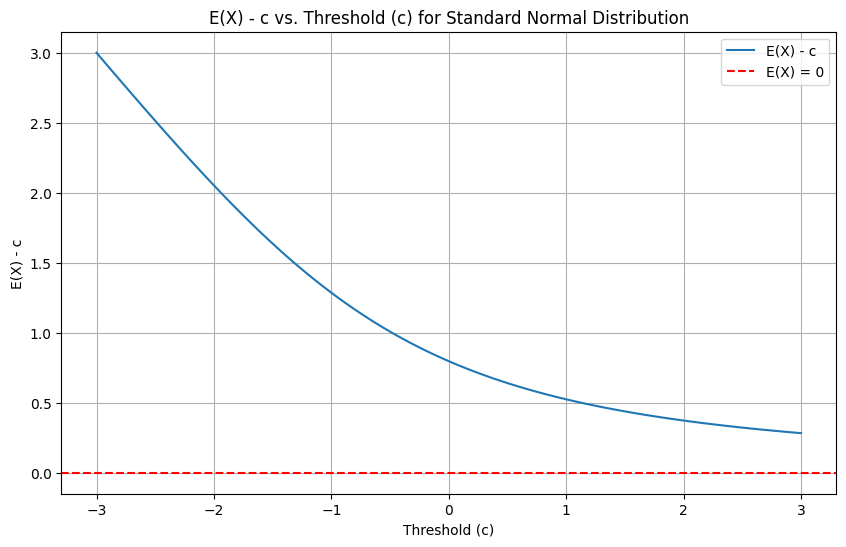

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Range of threshold values
c_values = np.linspace(-3, 3, 100)  # Adjust the range as needed

# Calculate the conditional expectations for different threshold values
conditional_expectations = [(mu + sigma * norm.pdf(c)) / (1 - norm.cdf(c)) - c for c in c_values]

# Plot the conditional expectations
plt.figure(figsize=(10, 6))
plt.plot(c_values, conditional_expectations, label='E(X) - c')
plt.xlabel('Threshold (c)')
plt.ylabel('E(X) - c')
plt.title('E(X) - c vs. Threshold (c) for Standard Normal Distribution')
plt.axhline(0, color='red', linestyle='--', label='E(X) = 0')
plt.legend()
plt.grid(True)
plt.show()


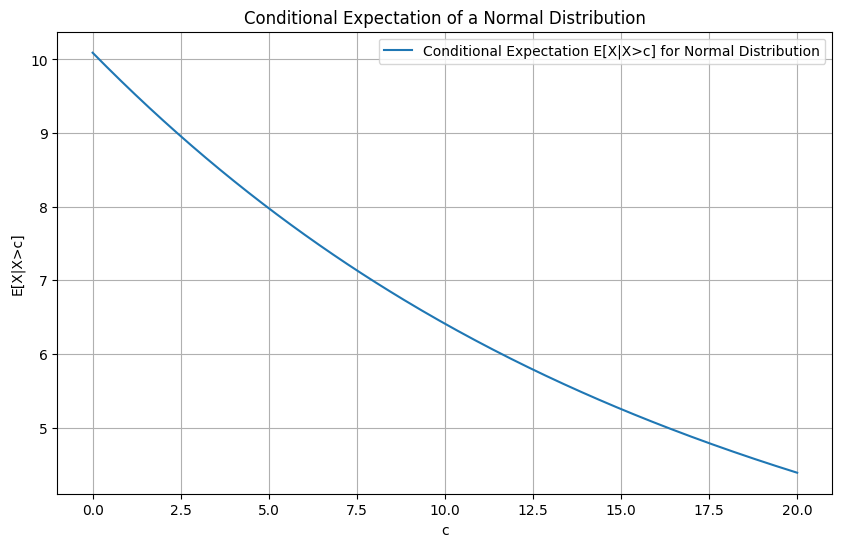

In [18]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Define the parameters for the truncated normal distribution
lower_bound = 0
upper_bound = 10
mean, std = 5, 10  # Assuming mean = 5 and standard deviation = 2 for this example
# Refined approach to calculate the conditional expectation

from scipy.stats import norm

# Define the function to calculate the conditional expectation for a normal distribution
def conditional_expectation_normal(c, mean, std):
    # Calculate the conditional expectation
    cond_expectation = mean + (std * norm.pdf((c - mean) / std) / (1 - norm.cdf((c - mean) / std)))
    return cond_expectation

# Generate values for c and corresponding conditional expectations for a normal distribution
c_values_normal = np.linspace(0, 20, 200)  # Extended range to show normal distribution behavior
expectations_normal = [conditional_expectation_normal(c, mean, std) - c for c in c_values_normal]

# Plotting the results for a normal distribution
plt.figure(figsize=(10, 6))
plt.plot(c_values_normal, expectations_normal, label='Conditional Expectation E[X|X>c] for Normal Distribution')
plt.xlabel('c')
plt.ylabel('E[X|X>c]')
plt.title('Conditional Expectation of a Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()


/home/zinccat/anaconda3/envs/tool/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2912: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  lbc = integrate.quad(fun, lb, c, **kwds)[0]
/home/zinccat/anaconda3/envs/tool/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2914: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  dub = integrate.quad(fun, d, ub, **kwds)[0]


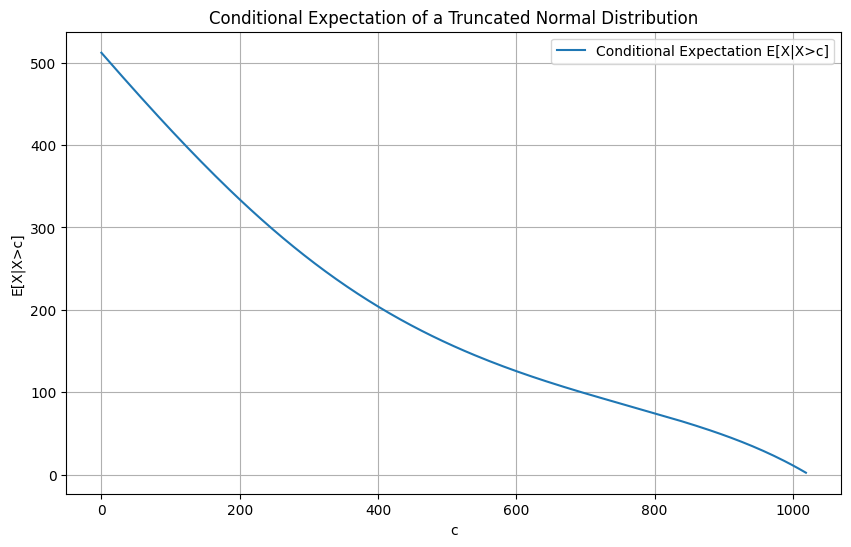

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Define the parameters for the truncated normal distribution
lower_bound = 0
upper_bound = 1024
mean, std = 512, 200  # Assuming mean = 5 and standard deviation = 2 for this example

# Define the function to calculate the conditional expectation
def conditional_expectation(c, lower_bound, upper_bound, mean, std):
    if c < lower_bound or c > upper_bound:
        raise ValueError("c must be within the bounds of the distribution")

    a, b = (lower_bound - mean) / std, (upper_bound - mean) / std
    c_scaled = (c - mean) / std

    # Calculate the conditional expectation
    numerator = truncnorm(a, b, loc=mean, scale=std).expect(lambda x: x, lb=c, ub=upper_bound)
    denominator = truncnorm(a, b, loc=mean, scale=std).cdf(upper_bound) - truncnorm(a, b, loc=mean, scale=std).cdf(c)

    if denominator == 0:
        return np.nan  # Avoid division by zero
    else:
        return numerator / denominator

# Generate values for c and corresponding conditional expectations
c_values = np.linspace(lower_bound, upper_bound, 200)
expectations = [conditional_expectation(c, lower_bound, upper_bound, mean, std) - c for c in c_values]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(c_values, expectations, label='Conditional Expectation E[X|X>c]')
plt.xlabel('c')
plt.ylabel('E[X|X>c]')
plt.title('Conditional Expectation of a Truncated Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()
